In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
NL_c = 0.01
NL_t = 0.4
NL_nu= 0.3034496449165134
NL_L = 1.8

alfx = np.tan(np.pi*NL_nu)
betx = NL_L/np.sin(2.0*np.pi*NL_nu)
print(betx,alfx)

1.9065054393933862 1.4082261727304293


In [3]:
beam, lattice = impact.readInputFile('test_IOTA.in')
lattice = impact.clearLattice(lattice)

ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
beam


         nCore_y: 4
         nCore_z: 4
             dim: 6
     n_particles: 1024000
      integrator: 'Linear'
     error_study: False
 standard_output: 'standard output'
         restart: False
        subcycle: False
         current: 0.0004113 [A]
  kinetic_energy: 2500000.0 [eV]
            mass: 938272045.0 [eV]
          charge: 1.0 [e]
       frequency: 30000000.0 [Hz]
           phase: 0.0 [rad]
            mesh: 'mesh' class
    distribution: 'distribution' class
    multi_charge: 'multi_charge' class

In [5]:
lattice[0].strength_t = 0.0
lattice[0]


             length: 1.8 [m]
           n_sckick: 96 [1]
              n_map: 5 [1]
         strength_t: 0.0
 transverse_scale_c: 0.01
        pipe_radius: 10.0 [m]
       tune_advance: 0.3034496449165134
               type: 'nonlinear_insert'

# get twiss param

In [6]:
emitx = 1.0e-12
beam.nCore_y = 2
beam.nCore_z = 2
beam.n_particles = 40000
beam.current = 0.0


# beam.distribution.distribution_type = 'IOTA_Gauss'
# beam.distribution.NL_t = NL_t
# beam.distribution.NL_c = NL_c
# beam.distribution.betx = betx
# beam.distribution.alfx = alfx
# beam.distribution.emitx = emitx
# beam.distribution.betz = 0.0
# beam.distribution.alfz = 0.0
# beam.distribution.emitz = 0.0
# beam.distribution.CL = 6.0
# beam.distribution.mode = 'twiss'



beam.distribution.distribution_type = 'Gauss'
beam.distribution.betx = betx
beam.distribution.alfx = alfx
beam.distribution.emitx = emitx
beam.distribution.bety = betx
beam.distribution.alfy = alfx
beam.distribution.emity = emitx
beam.distribution.betz = 0.0
beam.distribution.alfz = 0.0
beam.distribution.emitz = 0.0
beam.distribution.mode = 'twiss'


loop = impact.getElem('loop')
loop.turns = 10

# write_pData = []
# for i in range(loop.turns):
#     write_pData.append(impact.getElem('write_raw_ptcl'))
#     write_pData[-1].turn = i+1
#     write_pData[-1].file_id = 701+i
#     write_pData[-1].format_id = 2


# impact.writeInputFile(beam,[loop] +write_pData +lattice);
impact.writeInputFile(beam,[loop] +lattice);
impact.run(beam,order=3)

0

In [7]:
optics_x = impact.readOptics('x')
optics_y = impact.readOptics('y')

In [8]:
optics_x.keys(),optics_y.keys()

(dict_keys(['s', 'betx', 'alfx', 'emitx', 'phx']),
 dict_keys(['s', 'bety', 'alfy', 'emity', 'phy']))

In [9]:
for key,val in optics_x.items():
    optics_x[key]=np.array(val[1:])

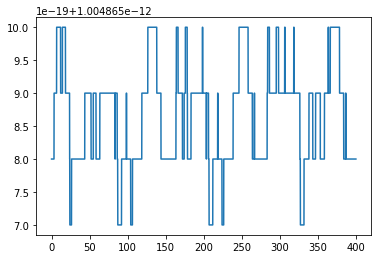

In [10]:
plt.plot(optics_x['s'],optics_x['emitx'])

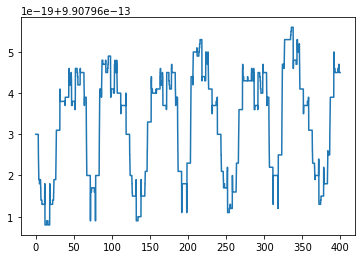

In [11]:
plt.plot(optics_y['s'],optics_y['emity'])

In [12]:
L    = optics_x['s'][-1]/10.0
ntot = len(optics_x['s'])
n    = int(ntot/10)

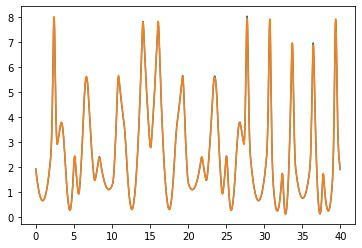

In [13]:
plt.plot(optics_x['s'][:n],optics_x['betx'][:n])
plt.plot(optics_x['s'][:n],optics_x['betx'][n:2*n])

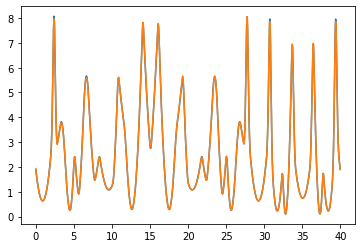

In [14]:
plt.plot(optics_x['s'][:n],optics_x['betx'][8*n: 9*n])
plt.plot(optics_x['s'][:n],optics_x['betx'][9*n:10*n])

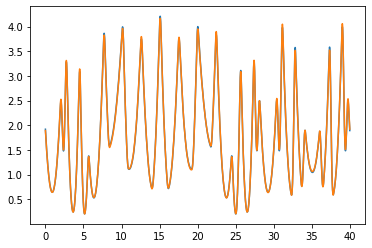

In [15]:
plt.plot(optics_y['s'][:n],optics_y['bety'][:n])
plt.plot(optics_y['s'][:n],optics_y['bety'][n:2*n])

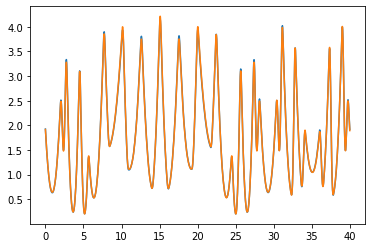

In [16]:
plt.plot(optics_y['s'][:n],optics_y['bety'][8*n: 9*n])
plt.plot(optics_y['s'][:n],optics_y['bety'][9*n:10*n])

In [17]:
s_data = np.array(optics_x['s'][:n])
betx_data = np.array(optics_x['betx'][9*n:10*n])
bety_data = np.array(optics_y['bety'][9*n:10*n])

# get beam size

In [18]:
beam.nCore_y = 2
beam.nCore_z = 2
beam.n_particles = 40000
beam.current = 0.0

energy = ke+mass
g = energy/mass
bg = np.sqrt(g**2-1.0)
print('bg=',bg)

beam.distribution.distribution_type = 'Gauss'
beam.distribution.betx = betx
beam.distribution.alfx = alfx
beam.distribution.emitx = 3.8e-6*bg
beam.distribution.bety = betx
beam.distribution.alfy = alfx
beam.distribution.emity = 1.62e-6*bg
beam.distribution.betz = 0.0
beam.distribution.alfz = 0.0
beam.distribution.emitz = 0.0
beam.distribution.mode = 'twiss'


loop = impact.getElem('loop')
loop.turns = 1

impact.writeInputFile(beam,[loop]+lattice);
impact.run(beam,order=3)

bg= 0.07304823257567683


0

In [19]:
optics_x = impact.readOptics('x')
optics_y = impact.readOptics('y')

In [20]:
for key,val in optics_x.items():
    optics_x[key]=np.array(val[1:])

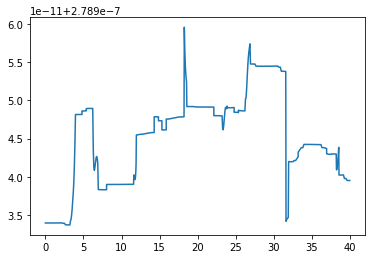

In [21]:
plt.plot(optics_x['s'],optics_x['emitx'])

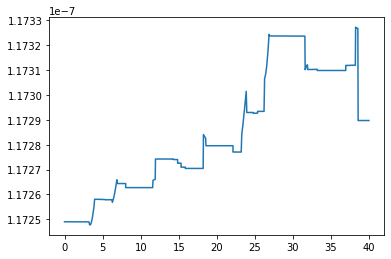

In [22]:
plt.plot(optics_y['s'],optics_y['emity'])

In [23]:
rmsX_data = np.array(impact.readRMS('x')['rms_x'][1:])
rmsY_data = np.array(impact.readRMS('y')['rms_y'][1:])

# Cal Laslett tune shift

In [24]:
dum,uniqueInd = np.unique(s_data,return_index=True)

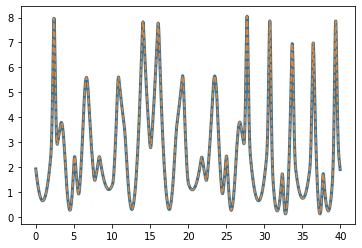

In [25]:
plt.plot(s_data[uniqueInd],betx_data[uniqueInd],lw=3)
plt.plot(s_data,betx_data,'--')

In [26]:
s_data = s_data[uniqueInd]
betx_data = betx_data[uniqueInd]
bety_data = bety_data[uniqueInd]
rmsX_data = rmsX_data[uniqueInd]
rmsY_data = rmsY_data[uniqueInd]

In [27]:
ke = 14.3996e-10 # eV.m.q^{-2}
r0 = ke/mass
v = bg/g * impact.data.clight
current = 0.0004113
numberCurrent = current/v/1.60217662e-19
Ks = numberCurrent*r0/(bg*bg*g)

### entire ring

In [28]:
import scipy
dnux = Ks*scipy.integrate.simps(y=betx_data/(rmsX_data*(rmsX_data+rmsY_data)),x=s_data)/(4*np.pi)
dnuy = Ks*scipy.integrate.simps(y=bety_data/(rmsY_data*(rmsX_data+rmsY_data)),x=s_data)/(4*np.pi)

In [29]:
dnux,dnuy

(0.017457781382412527, 0.025333494635788423)

In [30]:
dnux = Ks*scipy.integrate.simps(y=betx_data/(rmsX_data*(rmsX_data+rmsY_data)),x=s_data)/(4*np.pi)
dnuy = Ks*scipy.integrate.simps(y=bety_data/(rmsY_data*(rmsX_data+rmsY_data)),x=s_data)/(4*np.pi)

### over NLinsert

In [31]:
s_data[:97]

array([0.     , 0.01875, 0.0375 , 0.05625, 0.075  , 0.09375, 0.1125 ,
       0.13125, 0.15   , 0.16875, 0.1875 , 0.20625, 0.225  , 0.24375,
       0.2625 , 0.28125, 0.3    , 0.31875, 0.3375 , 0.35625, 0.375  ,
       0.39375, 0.4125 , 0.43125, 0.45   , 0.46875, 0.4875 , 0.50625,
       0.525  , 0.54375, 0.5625 , 0.58125, 0.6    , 0.61875, 0.6375 ,
       0.65625, 0.675  , 0.69375, 0.7125 , 0.73125, 0.75   , 0.76875,
       0.7875 , 0.80625, 0.825  , 0.84375, 0.8625 , 0.88125, 0.9    ,
       0.91875, 0.9375 , 0.95625, 0.975  , 0.99375, 1.0125 , 1.03125,
       1.05   , 1.06875, 1.0875 , 1.10625, 1.125  , 1.14375, 1.1625 ,
       1.18125, 1.2    , 1.21875, 1.2375 , 1.25625, 1.275  , 1.29375,
       1.3125 , 1.33125, 1.35   , 1.36875, 1.3875 , 1.40625, 1.425  ,
       1.44375, 1.4625 , 1.48125, 1.5    , 1.51875, 1.5375 , 1.55625,
       1.575  , 1.59375, 1.6125 , 1.63125, 1.65   , 1.66875, 1.6875 ,
       1.70625, 1.725  , 1.74375, 1.7625 , 1.78125, 1.8    ])

In [32]:
dnuxNL = Ks*scipy.integrate.simps(y=betx_data[:97]/(rmsX_data[:97]*(rmsX_data[:97]+rmsY_data[:97])),x=s_data[:97])/(4*np.pi)
dnuyNL = Ks*scipy.integrate.simps(y=bety_data[:97]/(rmsY_data[:97]*(rmsX_data[:97]+rmsY_data[:97])),x=s_data[:97])/(4*np.pi)

In [33]:
dnuxNL, dnuyNL

(0.0007667793087541448, 0.0011852879230499437)

In [34]:
dnux, dnuy

(0.017457781382412527, 0.025333494635788423)

In [35]:
dnux-dnuxNL, dnux-dnuxNL, 

(0.01669100207365838, 0.01669100207365838)

In [36]:
dnuxNL/(dnux-dnuxNL),dnuyNL/(dnuy-dnuyNL)

(0.045939680875378384, 0.04908389004408718)